<a href="https://colab.research.google.com/github/FransHutagalung/Lang-Graph/blob/main/Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 19.0 MB/s eta 0:00:00


In [2]:
pip install ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.0 MB/s eta 0:00:00


In [49]:
from typing import Dict , TypedDict , List
from langgraph.graph import StateGraph , START , END

In [ ]:
# build AI Agent State
class AgentState(TypedDict) : # our state schema
  message : str
  name : str
  values : List[int]

def greeting_node(state : AgentState) -> AgentState :
  """Simple Node that adds a greeting message to the state """
  state["message"] = "hey " + state["message"] + " how is your day going ?"
  return state

def learning_graduate(state : AgentState) -> AgentState :
  state["message"] = f"{state['name']} , you are doing an amazing job learning LangGraph!"
  return state

def process_values(state : AgentState) -> AgentState :
  print(state)
  state["message"] = f"Hello {state['name']} your values is {sum(state['values'])}"
  print(state)
  return state


In [ ]:
class AgentState(TypedDict) :
  values : List[int]
  operation : str
  result : int

def result_values(state : AgentState) -> AgentState :
  if state["operation"] == "sum" :
    state["result"] = sum(state["values"])
  elif state["operation"] == "average" :
    state["result"] = sum(state["values"]) / len(state["values"])
  elif state["operation"] == "multiple" :
    state["result"] = 1
    for value in state["values"] :
      state["result"] *= value

  return state

In [ ]:
graph = StateGraph(AgentState)

In [ ]:
graph.add_node("learning_graduate" , learning_graduate)
graph.add_node("greeter" , greeting_node)
graph.add_node("process_values" , process_values)

In [ ]:
graph.add_node("math" , result_values)

In [ ]:
graph.set_entry_point("learning_graduate")

In [ ]:
graph.set_entry_point("math")
graph.set_finish_point("math")

In [ ]:
graph.add_edge("learning_graduate", "greeter")
graph.add_edge("greeter", "process_values")

In [ ]:
graph.set_finish_point("process_values")

In [ ]:
app = graph.compile()

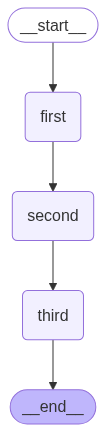

In [12]:
from IPython.display import Image ,  display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"values" : [1,2,3,4], "operation" : "multiple"})

In [ ]:
print(result)

{'values': [1, 2, 3, 4], 'operation': 'multiple', 'result': 24}


In [39]:
class AgentState(TypedDict) :
  name : str
  age : int
  skills : List[str]
  result : str


In [40]:
def first_node(state : AgentState) -> AgentState :
  state["result"] = f"{state['name']} , welcome to the system !"
  return state

def second_node(state : AgentState) -> AgentState :
  print(state)
  state["result"] = f"{state['result']} You are {state['age']} years old ! "
  print(state)
  return state

def third_node(state : AgentState) -> AgentState :
  skills_string = ", ".join(state['skills'])
  state["result"] = f"{state['result']} You have skills in {skills_string}"
  return state

In [41]:
graph = StateGraph(AgentState)

In [42]:
graph.add_node("first" , first_node)
graph.add_node("second" , second_node)
graph.add_node("third" , third_node)

In [43]:
graph.add_edge("first" , "second")
graph.add_edge("second" , "third")

In [44]:
graph.set_entry_point("first")
graph.set_finish_point("third")

In [45]:
app = graph.compile()

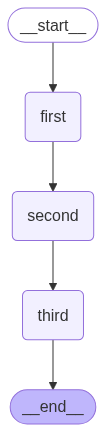

In [53]:
from IPython.display import Image ,  display
display(Image(app.get_graph().draw_mermaid_png()))

In [47]:
result = app.invoke({'name' : 'Fransiskus' , 'age' : 21 , 'skills' : ['python' , 'java' , 'golang']})

{'name': 'Fransiskus', 'age': 21, 'skills': ['python', 'java', 'golang'], 'result': 'Fransiskus , welcome to the system !'}
{'name': 'Fransiskus', 'age': 21, 'skills': ['python', 'java', 'golang'], 'result': 'Fransiskus , welcome to the system ! You are 21 years old ! '}


In [48]:
print(result)

{'name': 'Fransiskus', 'age': 21, 'skills': ['python', 'java', 'golang'], 'result': 'Fransiskus , welcome to the system ! You are 21 years old !  You have skills in python, java, golang'}


In [67]:
class AgentState(TypedDict) :
  number1 : int
  number2 : int
  final_number : float
  operation : str

def adder(state : AgentState) -> AgentState :
  state["final_number"] = state["number1"] + state["number2"]
  return state

def subtractor(state : AgentState) -> AgentState :
  state["final_number"] = state["number1"] - state["number2"]
  return state

def decide_next_node(state : AgentState) -> AgentState :
  if state["operation"] == "+" :
    return "addition_operation"
  elif state["operation"] == "-" :
    return "substraction_operation"
  else :
    return

In [68]:
graph = StateGraph(AgentState)

graph.add_node("add_node" , adder)
graph.add_node("substract_node" , subtractor)
graph.add_node("router" , lambda state:state )

graph.add_edge(START , "router")

graph.add_conditional_edges(
    "router"  ,
    decide_next_node ,
    {
        "addition_operation" : "add_node",
        "substraction_operation" : "substract_node"
    }
)

graph.add_edge("add_node" , END)
graph.add_edge("substract_node" , END)

In [69]:
app = graph.compile()

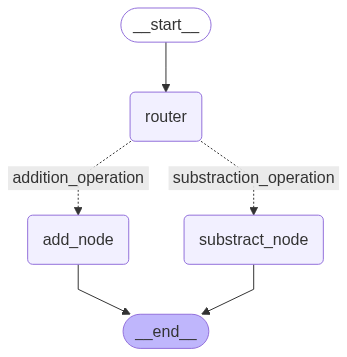

In [70]:
from IPython.display import Image ,  display
display(Image(app.get_graph().draw_mermaid_png()))

In [71]:
initial_state1 = AgentState(number1 = 10 , number2 = 5 , operation = "+")
initial_state2 = AgentState(number1 = 10 , number2 = 5 , operation = "-")

print(app.invoke(initial_state1))


{'number1': 10, 'number2': 5, 'final_number': 15, 'operation': '+'}
